<a href="https://colab.research.google.com/github/tdlinh2712/DeepLearning-with-Tensorflow/blob/master/ANN_Classifier_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [6]:
mnist = tf.keras.datasets.mnist

In [15]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [16]:
print("X_train shape: ", x_train.shape)

X_train shape:  (60000, 28, 28)


In [17]:
x_train, x_test = x_train/255.0, x_test/255.0
print("X_train shape: ", x_train.shape)

X_train shape:  (60000, 28, 28)


In [11]:
from tensorflow.keras import models, layers

In [13]:
# build the model
model = tf.keras.models.Sequential([
  layers.Flatten(input_shape=(28,28)),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(10, activation='softmax')
])

In [14]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [18]:

#train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2922 - accuracy: 0.9161 - val_loss: 0.1351 - val_accuracy: 0.9605
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1410 - accuracy: 0.9584 - val_loss: 0.0973 - val_accuracy: 0.9695
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1086 - accuracy: 0.9667 - val_loss: 0.0869 - val_accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0877 - accuracy: 0.9725 - val_loss: 0.0819 - val_accuracy: 0.9761
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0759 - accuracy: 0.9761 - val_loss: 0.0786 - val_accuracy: 0.9762
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0662 - accuracy: 0.9791 - val_loss: 0.0751 - val_accuracy: 0.9773
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0589 - accuracy: 0.9810 - val_loss: 0.0762 - val_accuracy:

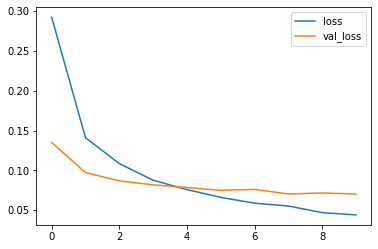

In [20]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

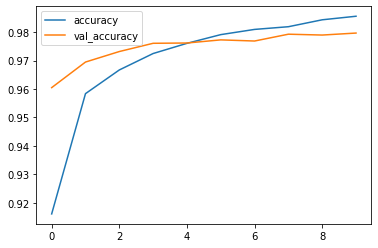

In [21]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [24]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0704 - accuracy: 0.9797
[0.0704013779759407, 0.9797000288963318]


In [32]:
print(model.layers)

[<keras.layers.core.flatten.Flatten object at 0x7f6aae230b10>, <keras.layers.core.dense.Dense object at 0x7f6aadf939d0>, <keras.layers.core.dropout.Dropout object at 0x7f6aaeec2cd0>, <keras.layers.core.dense.Dense object at 0x7f6aae00a510>]


In [33]:
y_hat = np.argmax(model.predict(x_test), axis=1)

In [30]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [34]:
#plot confusion matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

tf.math.confusion_matrix(y_test, y_hat)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    1,    2,    1,    0,    1,    2,    1,    3,    0],
       [   0, 1127,    3,    1,    0,    1,    1,    1,    1,    0],
       [   0,    1, 1012,    1,    1,    0,    2,    6,    8,    1],
       [   0,    0,    2,  989,    0,    8,    0,    3,    4,    4],
       [   0,    0,    5,    1,  967,    1,    2,    1,    0,    5],
       [   3,    1,    0,    5,    1,  871,    3,    1,    6,    1],
       [   3,    3,    1,    1,    3,    3,  940,    0,    4,    0],
       [   2,    9,   12,    2,    1,    0,    0,  994,    3,    5],
       [   3,    0,    1,    3,    3,    2,    1,    3,  954,    4],
       [   0,    3,    0,    6,   17,    2,    1,    2,    4,  974]],
      dtype=int32)>

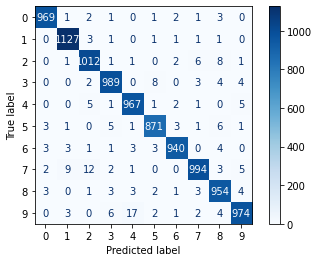

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_hat,  cmap='Blues')

Text(0.5, 1.0, 'True label: 5 Predicted as: 7')

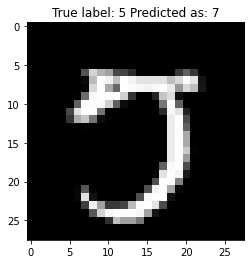

In [50]:
#plot misclassified examples
misclassified_idx = np.where(y_hat != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted as: %s" % (y_test[i], y_hat[i]))